In [90]:
#pip install pycaret

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from PIL import Image

In [92]:
def moveup(img):
    while True:
        if np.all(img[0] >= 240):
            img = np.delete(img, 0, axis=0)
        else:
            break
    return img

def movedown(img):
    while True:
        if np.all(img[-1] >= 240):
            img = np.delete(img, -1, axis=0)
        else:
            break
    return img

def moveleft(img):
    while True:
        if np.all(img[:, 0] >= 240):
            img = img[:, 1:]
        else:
            break
    return img

def moveright(img):
    while True:
        if np.all(img[:, -1] >= 240):
            img = img[:, :-1]
        else:
            break
    return img

def rescale(img):
    img = moveup(img)
    img = movedown(img)
    img = moveleft(img)
    img = moveright(img)
    return img

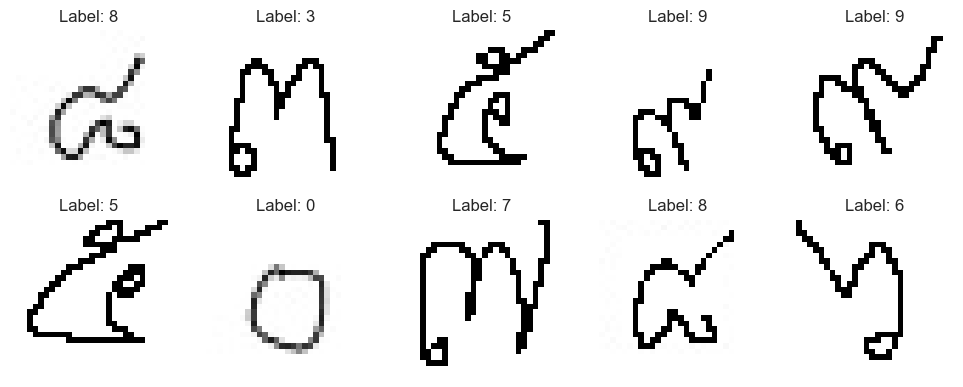

In [93]:
directory = './thainumber/'

# Get a list of all image file paths in the directory
image_paths = []
for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    for file_name in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, file_name)
        image_paths.append(file_path)

# Randomly select 10 image paths
random_image_paths = np.random.choice(image_paths, size=10, replace=False)

# Create subplots with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Loop through the randomly selected image paths and corresponding subplots
for i, (file_path, ax) in enumerate(zip(random_image_paths, axes.flatten())):
    # Open the image using PIL
    image = Image.open(file_path)

    # Convert the image to grayscale
    image = image.convert('L')

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Label the image based on the subdirectory name
    label = int(os.path.basename(os.path.dirname(file_path)))

    # Display the processed image on the current subplot
    ax.imshow(image_array, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [94]:
print(image_paths)
print(labels)

['./thainumber/0\\0-1.png', './thainumber/0\\0-11.png', './thainumber/0\\0-2.png', './thainumber/0\\0-21.png', './thainumber/0\\0-3.png', './thainumber/0\\0-31.png', './thainumber/0\\0-4.png', './thainumber/0\\0-41.png', './thainumber/0\\0-5.png', './thainumber/0\\0-51.png', './thainumber/0\\IMG_0953.png', './thainumber/0\\IMG_0954.png', './thainumber/0\\IMG_0955.png', './thainumber/0\\IMG_0956.png', './thainumber/0\\IMG_0957.png', './thainumber/0\\IMG_0958.png', './thainumber/0\\IMG_0959.png', './thainumber/0\\IMG_0960.png', './thainumber/0\\IMG_0961.png', './thainumber/0\\IMG_0962.png', './thainumber/0\\zero.png', './thainumber/0\\zero1.png', './thainumber/0\\zero2.png', './thainumber/0\\zero3.png', './thainumber/0\\zero4.png', './thainumber/0\\zero5.png', './thainumber/0\\zero6.png', './thainumber/0\\zero7.png', './thainumber/0\\zero8.png', './thainumber/0\\zero9.png', './thainumber/1\\1-1.png', './thainumber/1\\1-2.png', './thainumber/1\\1-3.png', './thainumber/1\\1-4.png', './thai

In [95]:
labels = list( map(lambda x: os.path.split( os.path.split(x)[0] )[1] ,image_paths) )

filepath = pd.Series(image_paths, name='image_paths').astype(str)
labels = pd.Series(labels, name='Label')

data = pd.concat([filepath, labels], axis=1)

data = data.sample(frac=1).reset_index(drop=True)   # Return a random sample of items from an axis of object.
data

,image_paths,Label
0,./thainumber/4\four3.png,4
1,./thainumber/1\IMG_0864.png,1
2,./thainumber/3\IMG_0884.png,3
3,./thainumber/5\5-21.png,5
4,./thainumber/9\9-1.png,9
...,...,...
295,./thainumber/0\IMG_0957.png,0
296,./thainumber/5\five5.png,5
297,./thainumber/3\IMG_0888.png,3
298,./thainumber/0\0-41.png,0


Text(0, 0.5, 'Counts')

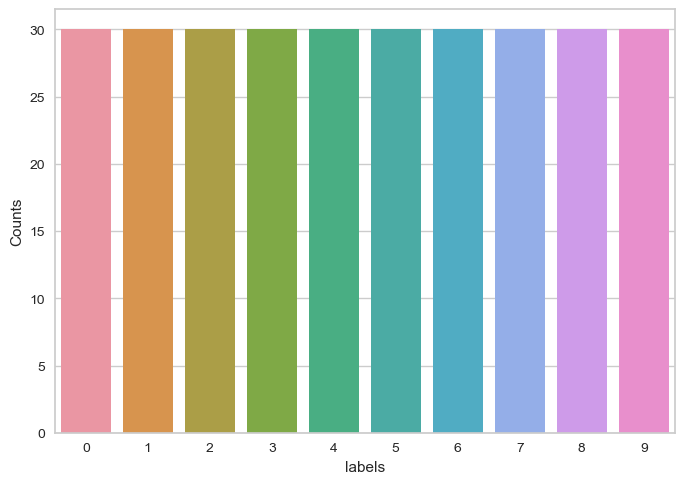

In [96]:
counts = data.Label.value_counts().sort_index()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('labels')
plt.ylabel('Counts')

In [101]:
Before_x = data['image_paths']
w = data['Label']

# To work with X, we need to flatten the images first.
read_x = []

for i in Before_x :
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = rescale(img)
    img = cv2.resize(img, (28, 28))
    img = img.flatten()
 
    read_x.append(img)

q = np.asarray(read_x)

In [103]:
q = pd.DataFrame(q)
w = pd.DataFrame(w)
df = pd.concat([q,w] , axis=1)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,114,255,255,4
1,252,254,255,254,253,254,255,255,254,254,...,254,254,255,253,253,255,255,255,255,1
2,255,255,255,253,249,224,179,154,148,155,...,255,255,255,255,249,238,236,243,246,3
3,255,255,255,255,255,255,100,0,0,0,...,209,255,253,250,255,255,255,255,255,5
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,9
5,255,109,0,0,0,109,255,255,255,255,...,0,0,0,0,0,0,0,109,255,2
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,159,32,3
7,255,255,255,255,255,255,255,223,32,0,...,0,0,159,255,255,255,255,255,255,0
8,255,255,254,254,254,255,254,253,252,254,...,255,255,255,255,255,255,255,255,255,3
9,252,252,254,255,254,254,253,253,252,254,...,255,254,253,216,108,0,109,218,255,7


In [106]:
s = setup(df, target = 'Label', session_id = 123, train_size = 0.8)

In [109]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:26:41
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [108]:
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9458,0.9964,0.9458,0.9559,0.9411,0.9396,0.9422,0.111
lr,Logistic Regression,0.9417,0.9983,0.9417,0.9510,0.9375,0.9349,0.9375,0.748
svm,SVM - Linear Kernel,0.9250,0.0000,0.9250,0.9408,0.9193,0.9163,0.9199,0.038
rf,Random Forest Classifier,0.9250,0.9938,0.9250,0.9436,0.9200,0.9163,0.9201,0.140
lightgbm,Light Gradient Boosting Machine,0.9208,0.9966,0.9208,0.9228,0.9115,0.9117,0.9157,0.680
lda,Linear Discriminant Analysis,0.8792,0.9854,0.8792,0.9048,0.8733,0.8652,0.8705,0.056
knn,K Neighbors Classifier,0.8667,0.9777,0.8667,0.8933,0.8591,0.8514,0.8576,0.058
gbc,Gradient Boosting Classifier,0.7458,0.9527,0.7458,0.7856,0.7300,0.7164,0.7279,3.479
ridge,Ridge Classifier,0.7292,0.0000,0.7292,0.7755,0.7208,0.6979,0.7063,0.035
dt,Decision Tree Classifier,0.6958,0.8315,0.6958,0.7079,0.6725,0.6615,0.6703,0.057


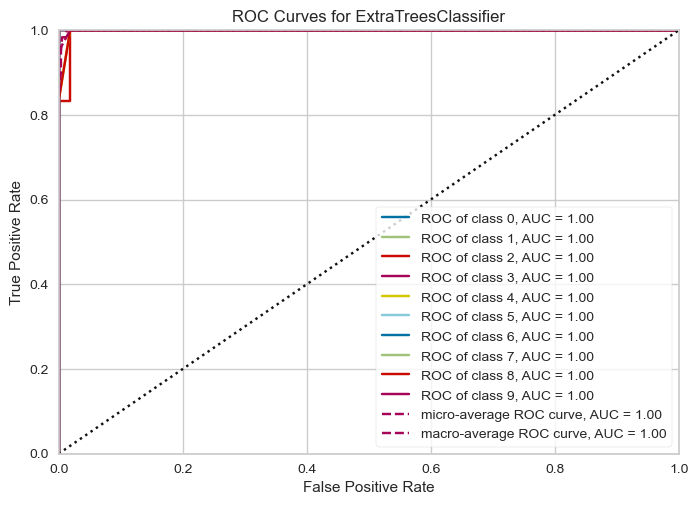

In [110]:
plot_model(best_model, plot="auc")

In [113]:
x_train, x_test, y_train, y_test = train_test_split(q, w, test_size=0.2, random_state=42, stratify= w)

In [114]:
pipeline_et = Pipeline([('scaler', MinMaxScaler()),
                 ('model', ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False))])
pipeline_et.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 MinMaxScaler(clip=False, copy=True, feature_range=(0, 1))),
                ('model',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [121]:
y_pred = pipeline_et.predict(x_test)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         6
           1     1.0000    1.0000    1.0000         6
           2     1.0000    1.0000    1.0000         6
           3     1.0000    1.0000    1.0000         6
           4     0.8571    1.0000    0.9231         6
           5     1.0000    0.8333    0.9091         6
           6     1.0000    1.0000    1.0000         6
           7     1.0000    0.6667    0.8000         6
           8     0.7500    1.0000    0.8571         6
           9     1.0000    1.0000    1.0000         6

    accuracy                         0.9500        60
   macro avg     0.9607    0.9500    0.9489        60
weighted avg     0.9607    0.9500    0.9489        60



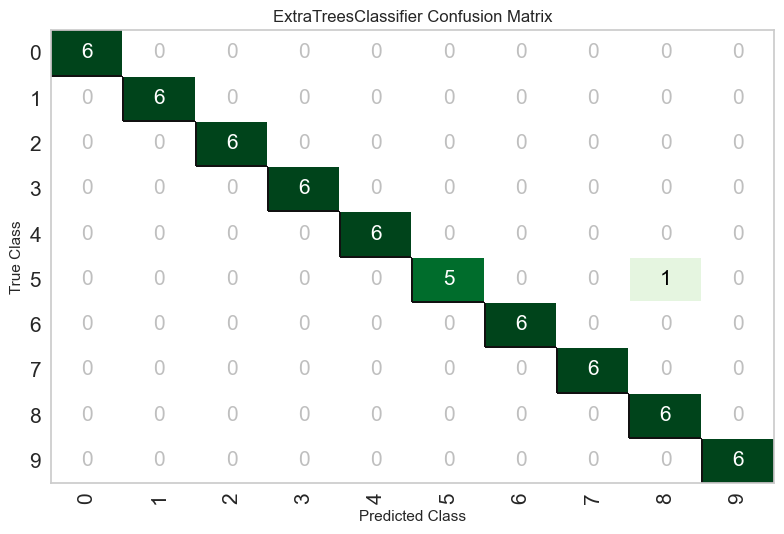

In [131]:
plot_model(best_model, plot="confusion_matrix")

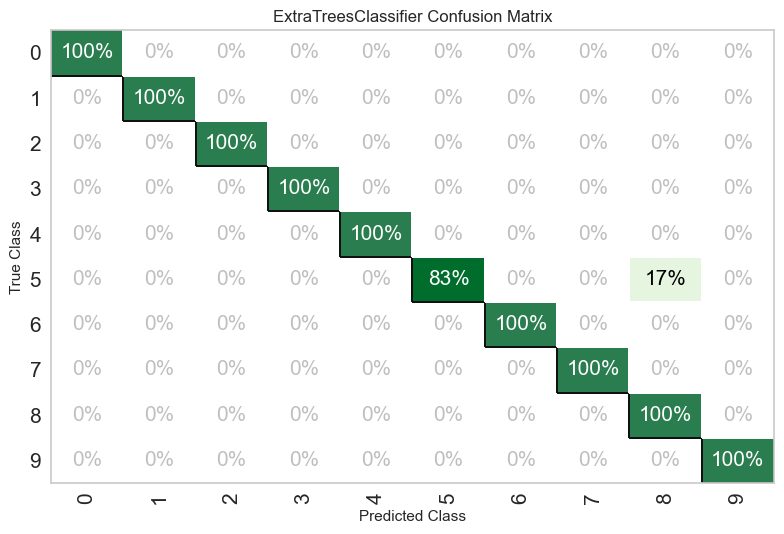

In [132]:
plot_model(best_model, plot="confusion_matrix", plot_kwargs = {'percent' : True})

In [133]:
import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [144]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((240, 784), (60, 784), (240, 1), (60, 1))